# 求数据集的前N个主成分

In [12]:
import numpy as np
import matplotlib.pyplot as plt

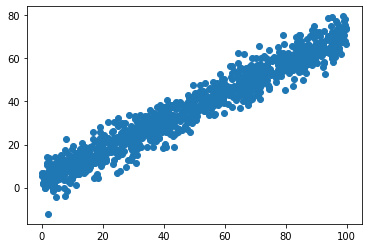

In [13]:
size = 1000
np.random.seed(666)
X = np.empty((size,2))
X[:,0] = np.random.uniform(0.,100.,size=size)
X[:,1] = 0.68 * X[:,0] + 3.57 + np.random.normal(0,5,size=size)

plt.scatter(X[:,0],X[:,1])
plt.show()

In [14]:
# 进行demean操作
def demean(X):
    return X - np.mean(X,axis=0)

# 求梯度值
def df(w, X):
    return X.T.dot(X.dot(w)) * (2 / len(X))


def direction(w):
    return w / np.linalg.norm(w)


# 求数据的第一主成分
def first_PCA(X, initial_w, eta=0.001, n_iters=10000):
    w = direction(initial_w)
    for i in range(n_iters):
        gradient = df(w, X)
        w = w + eta * gradient
        w = direction(w)
    return w


# 求数据前N个主成分
def first_N_PCA(n, X, eta=0.001, n_iters=10000):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    # 求n个主成分
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_PCA(X_pca, initial_w, eta) 
        res.append(w)
        # 减去刚刚求得的主成分分量
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    return res

In [17]:
w_n = first_N_PCA(2,X)
print(w_n)
print(w_n[0].dot(w_n[1]))


[array([0.8222663 , 0.56910292]), array([-0.56910292,  0.8222663 ])]
1.3322676295501878e-15
